Testing completed_data_C02__01.csv

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# load data into a Pandas DataFrame
# df = pd.read_csv('simplified_data.csv') 
df = pd.read_csv('autocomplete_data/completed_data__C02__01.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print(df.shape)

(1256, 62)


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   edad                               1256 non-null   float64
 1   peso                               1256 non-null   float64
 2   talla                              1256 non-null   float64
 3   imc                                1256 non-null   float64
 4   sexo                               1256 non-null   float64
 5   color_piel                         1256 non-null   float64
 6   asa                                1256 non-null   float64
 7   clopidogrel                        1256 non-null   float64
 8   heparina                           1256 non-null   float64
 9   estatinas                          1256 non-null   float64
 10  estreptoquinasa_recombinante       1256 non-null   float64
 11  reperfusion                        1256 non-null   float

edad         peso        talla          imc         sexo  \
count  1256.000000  1256.000000  1256.000000  1256.000000  1256.000000   
mean     66.025478    73.157643   168.117038    25.825707     0.685510   
std      12.612306    11.709661     5.777949     3.635491     0.464498   
min      13.000000    40.000000   120.000000    16.135000     0.000000   
25%      57.000000    65.000000   165.000000    23.148000     0.000000   
50%      66.000000    72.000000   168.000000    25.649000     1.000000   
75%      75.000000    81.000000   172.000000    28.092750     1.000000   
max      96.000000   140.000000   184.000000    58.273000     1.000000   

        color_piel          asa  clopidogrel     heparina    estatinas  ...  \
count  1256.000000  1256.000000  1256.000000  1256.000000  1256.000000  ...   
mean      0.906051     5.010350     0.960191     0.993631     0.980096  ...   
std       0.291874     4.844092     0.195588     0.079586     0.139728  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     3.000000     1.000000     1.000000     1.000000  ...   
50%       1.000000     4.000000     1.000000     1.000000     1.000000  ...   
75%       1.000000     5.000000     1.000000     1.000000     1.000000  ...   
max       1.000000    48.000000     1.000000     1.000000     1.000000  ...   

         TV/FV/PCR     Isquemia          ICC     Arritmia   creatinina  \
count  1256.000000  1256.000000  1256.000000  1256.000000  1256.000000   
mean      0.087580     0.209395     0.282643     0.129777   102.531051   
std       0.282795     0.407039     0.450464     0.336192    59.334307   
min       0.000000     0.000000     0.000000     0.000000    38.000000   
25%       0.000000     0.000000     0.000000     0.000000    78.000000   
50%       0.000000     0.000000     0.000000     0.000000    89.000000   
75%       0.000000     0.000000     1.000000     0.000000   113.000000   
max       1.000000     1.000000     1.000000     1.000000  1036.000000   

       filtrado_glomerular     glicemia          ada  \
count          1256.000000  1256.000000  1256.000000   
mean             65.876380     7.583599     0.484076   
std              24.787143     3.513755     0.499945   
min               3.115000     3.300000     0.000000   
25%              47.251000     5.500000     0.000000   
50%              64.949000     6.400000     0.000000   
75%              82.555750     8.400000     1.000000   
max             179.424000    43.000000     1.000000   

       primera_asistencia_medica  estado_vital  
count                1256.000000   1256.000000  
mean                  199.944268      0.092357  
std                   219.356727      0.289644  
min                     4.000000      0.000000  
25%                    60.000000      0.000000  
50%                   120.000000      0.000000  
75%                   180.000000      0.000000  
max                  1080.000000      1.000000  

[8 rows x 62 columns]

From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure, are unrealistic. This suggests the presence of outliers in the data.

0.0    1140
1.0     116
Name: estado_vital, dtype: int64


Text(0, 0.5, 'Number of Observations')

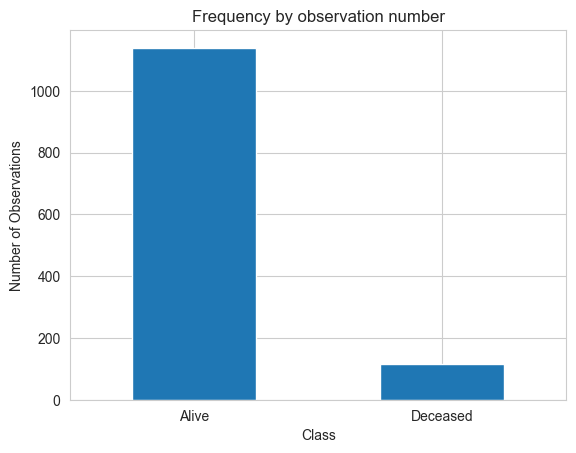

In [18]:
# check distribution of target variable
print(df.estado_vital.value_counts())

count_classes = pd.value_counts(df['estado_vital'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Alive', 'Deceased'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

1215 out of 1353 cases in this dataset are labelled alive, and 138 cases are labelled dead. This suggests that the dataset is not balanced. We will need to take this into account when we split the dataset into training and test sets.

<Axes: >

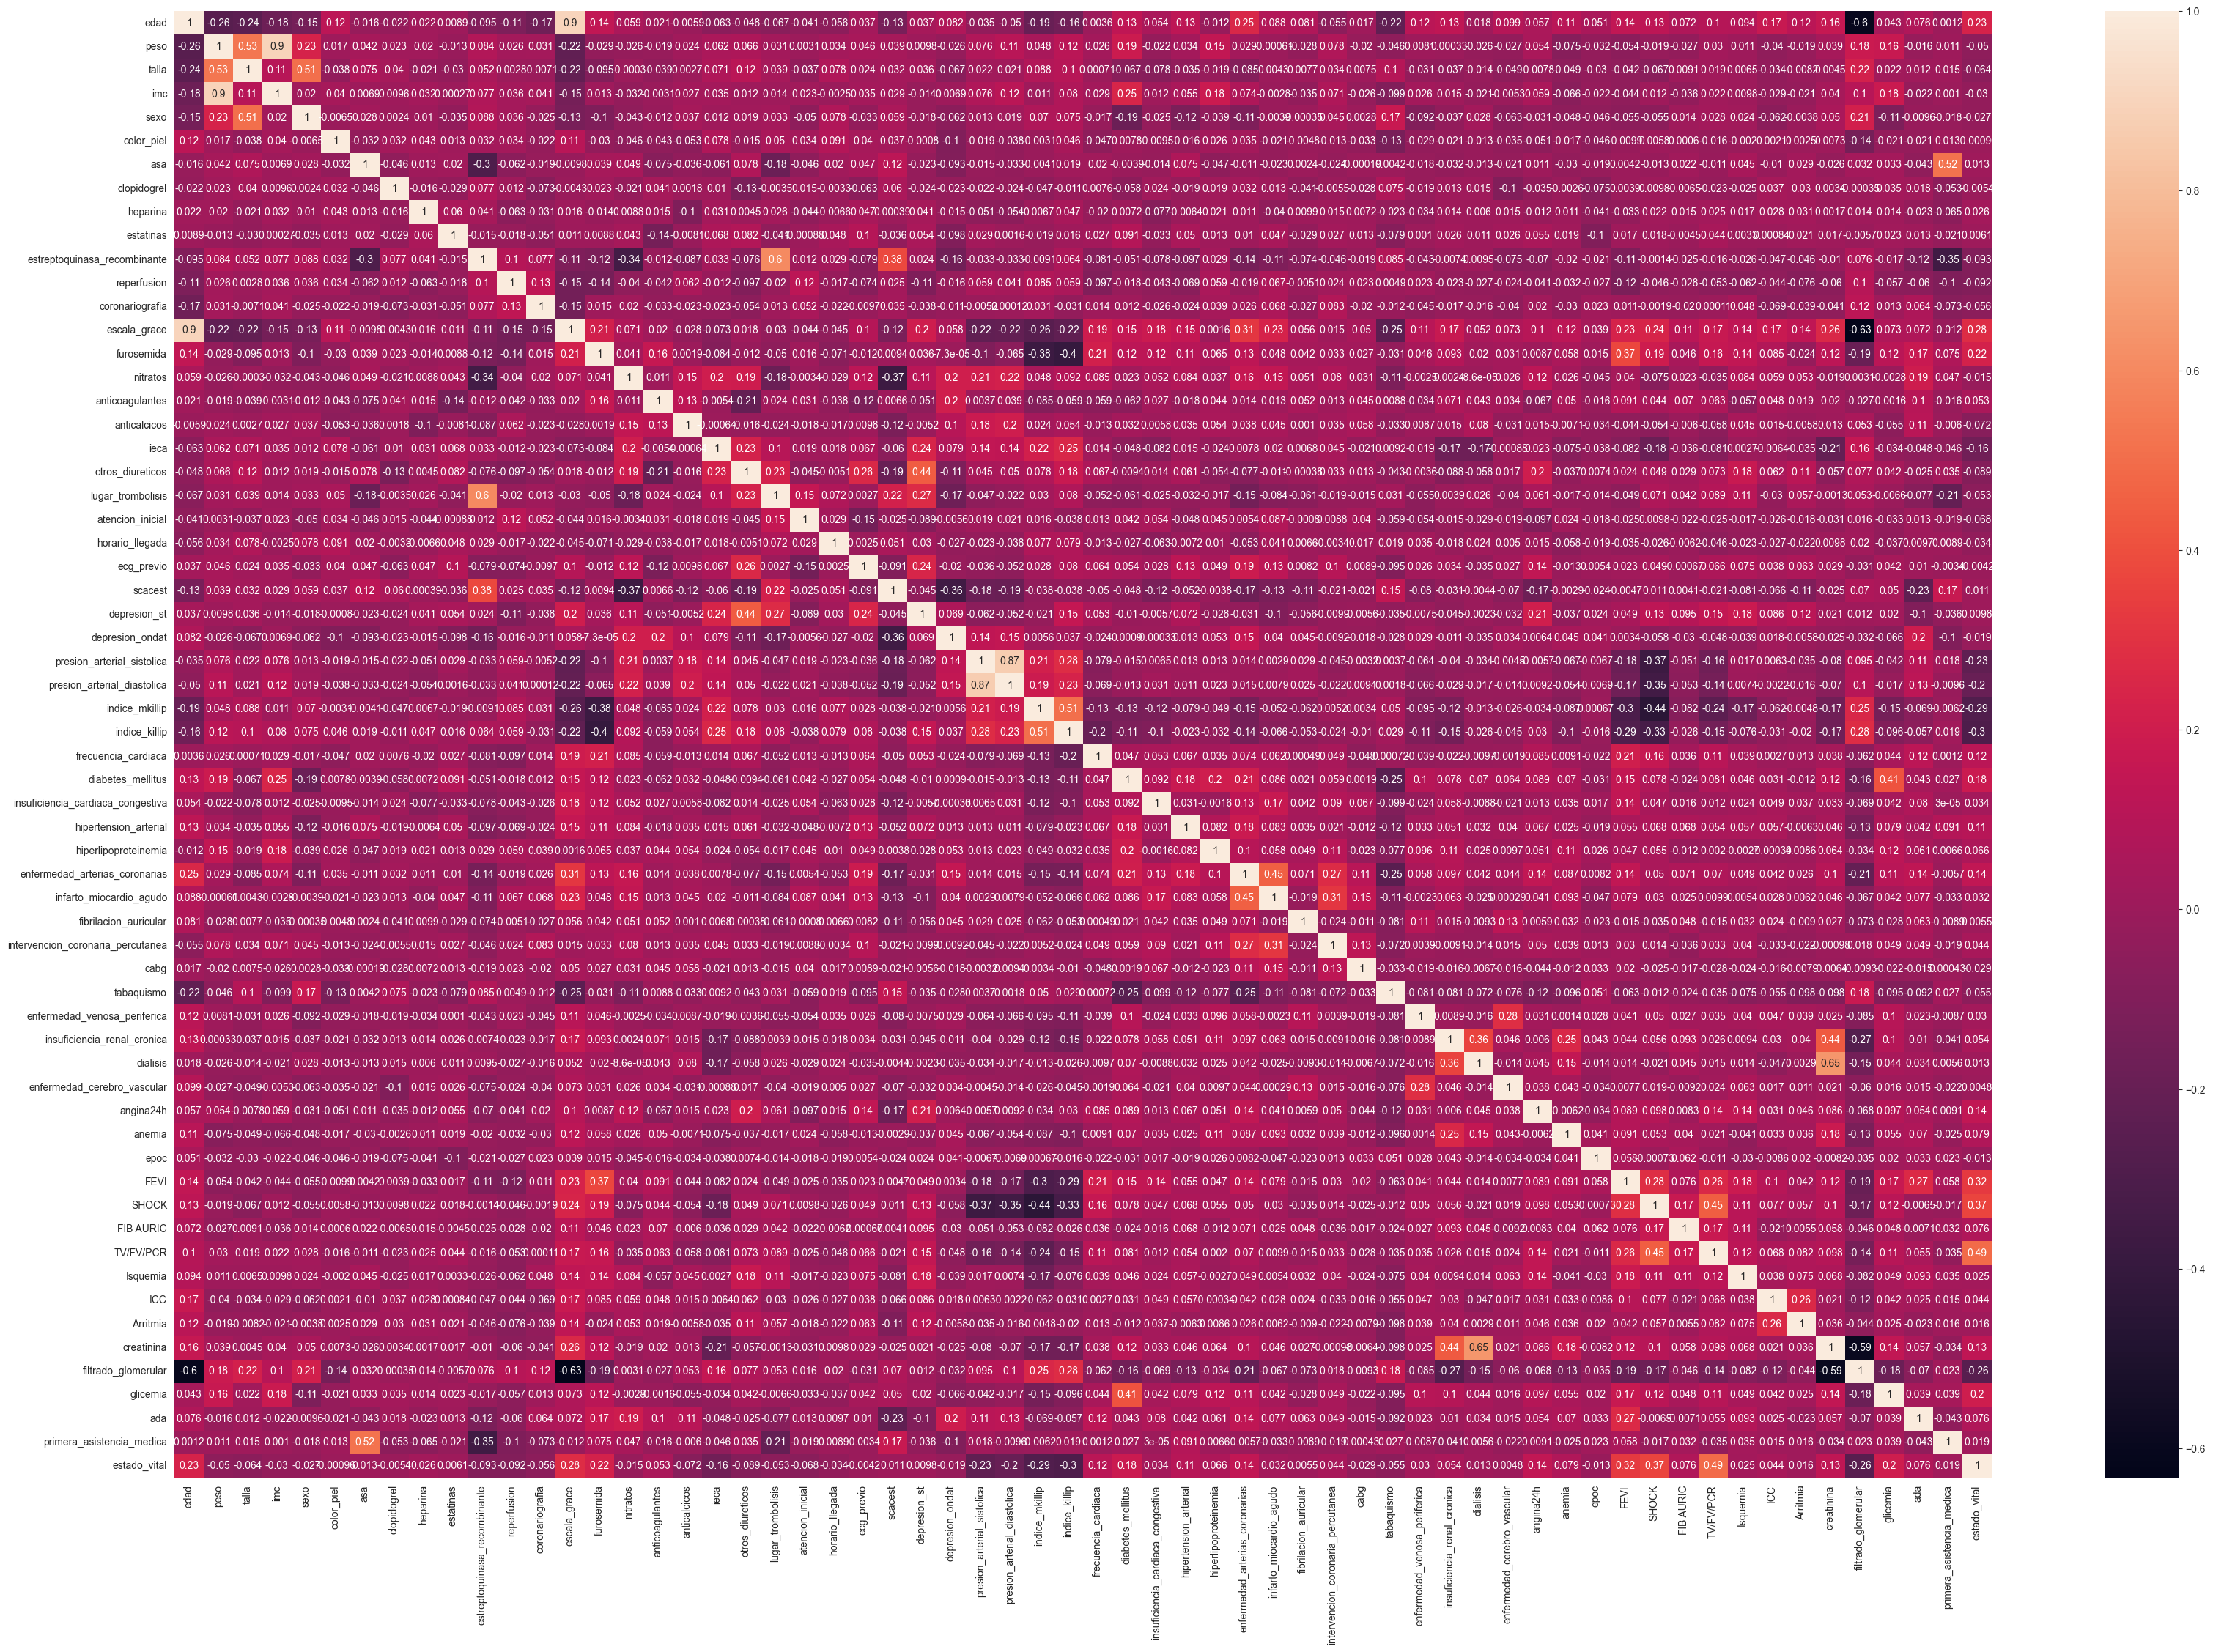

In [21]:
# check correlations
plt.subplots(figsize=(40,26))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (estado_vital) and that generally, there do not exist significant correlations between other variables. However, correlations exist between two variables:
- Creatinina and insufuciencia_renal_crónica are correlated with a score of 0.45.


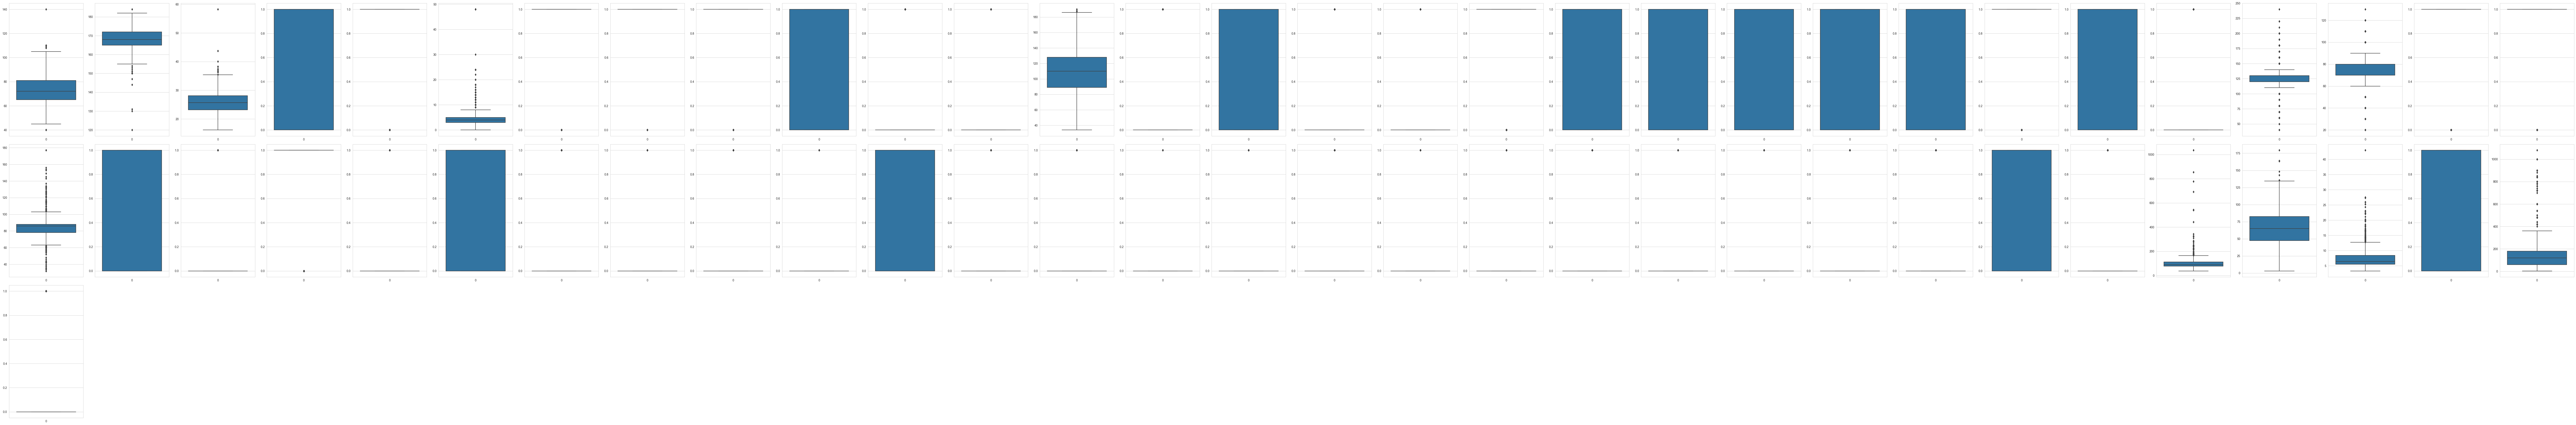

In [23]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,int(number_of_columns),i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables. These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

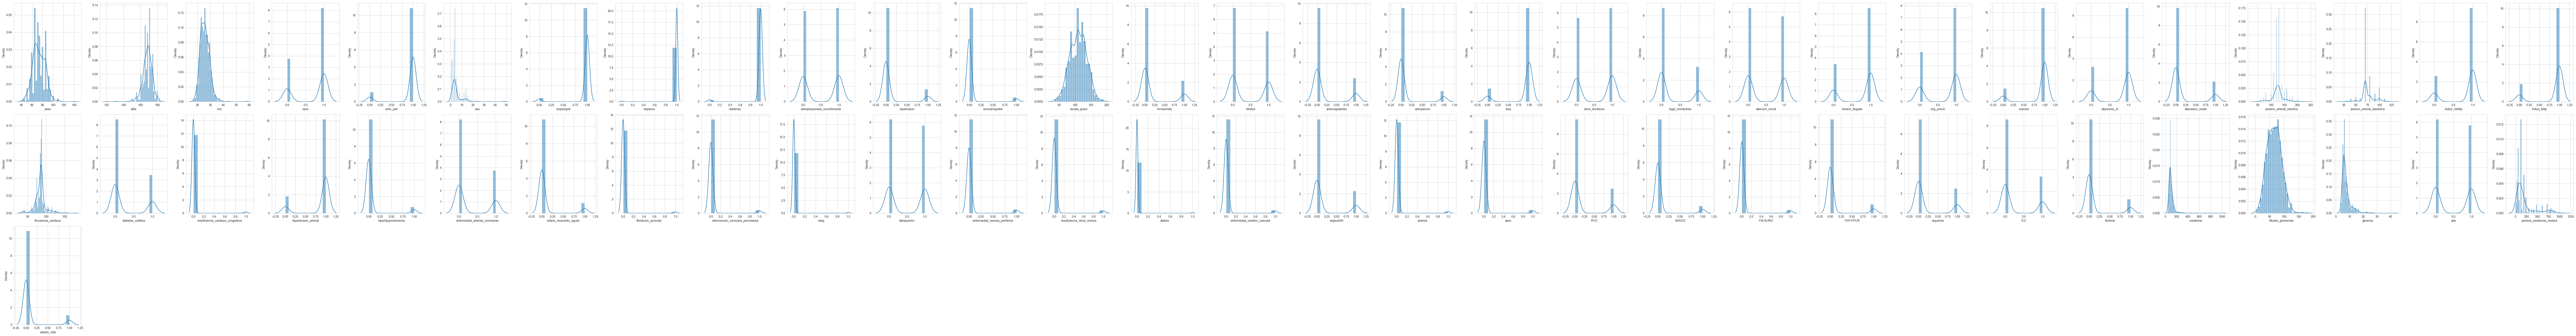

In [24]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,int(number_of_columns),i)
        sns.histplot(df[l[i]],kde=True,stat='density', kde_kws=dict(cut=3)) 
        plt.tight_layout()
        
check_dist(df)

Histograms show the distribution of each feature in the dataset. There appears to be some variation in weight, but edad, frecuencia cardiaca and creatinina are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as sexo, hipertension_arterial, diabetes_mellitus, tabaquismo, fibricación auricular, insuficiencia renal cronica, ieca, furosemida, otros diureticos y clopidogrel.

Note that we are dealing with a mix of continuous, ordinal, and binary data, as confirmed from the above data analysis. We can combine all of these data types in one model. Here are a few typical steps we took to preprocess this data before modeling.

- Standardize all continuous features: All continuous input should be standardized. For every continuous feature, compute its mean (𝜇) and standard deviation (𝜎) and calculate 𝑥 = (𝑥−𝜇) / 𝜎.
- Binarize categorical/discrete features (create dummy variables): For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called cholesterol, have 3 boolean features - chol_normal, chol_above_normal, chol_well_above_normal and appropriately set these features to 0 or 1. As can be seen, for every categorical feature, k binary features are added, where k is the number of values that the categorical feature takes.

In [29]:
cont_cols = ['edad','peso','talla','imc','asa','escala_grace','presion_arterial_sistolica','presion_arterial_diastolica','frecuencia_cardiaca','creatinina','filtrado_glomerular','glicemia','primera_asistencia_medica']
bin_cols = ['estado_vital','sexo','color_piel','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','nitratos','anticoagulantes','anticalcicos','otros_diureticos','lugar_trombolisis','atencion_inicial','horario_llegada','ecg_previo','scacest','depresion_st','depresion_ondat','indice_killip','clopidogrel','heparina','estatinas','estreptoquinasa_recombinante','reperfusion','coronariografia','hiperlipoproteinemia','enfermedad_arterias_coronarias','infarto_miocardio_agudo','intervencion_coronaria_percutanea','cabg','enfermedad_venosa_periferica','dialisis','enfermedad_cerebro_vascular','angina24h','anemia','epoc','FEVI','SHOCK','FIB AURIC','TV/FV/PCR','Isquemia','ICC','Arritmia','ada']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
df_normalized.head()

edad  peso     talla       imc       asa  escala_grace  \
0  0.000000  0.45  0.718750  0.349115  0.083333      0.076923   
1  0.024096  0.17  0.546875  0.180122  0.020833      0.153846   
2  0.072289  0.25  0.468750  0.302672  0.020833      0.000000   
3  0.120482  0.30  0.875000  0.153377  0.500000      0.121795   
4  0.180723  0.35  0.750000  0.247710  0.041667      0.057692   

   presion_arterial_sistolica  presion_arterial_diastolica  \
0                         0.4                     0.454545   
1                         0.4                     0.454545   
2                         0.4                     0.545455   
3                         0.4                     0.454545   
4                         0.6                     0.727273   

   frecuencia_cardiaca  creatinina  filtrado_glomerular  glicemia  \
0             0.193103    0.032064             0.594819  0.098237   
1             0.434483    0.067134             0.352245  0.188917   
2             0.241379    0.023046             0.675842  0.173804   
3             0.386207    0.043086             0.617320  0.035264   
4             0.310345    0.036072             0.657958  0.073048   

   primera_asistencia_medica  
0                   0.107807  
1                   0.330855  
2                   0.107807  
3                   0.107807  
4                   0.052045

In [30]:
df_normalized = pd.concat([df_normalized, df[bin_cols]], axis=1)

df_normalized.head()

edad  peso     talla       imc       asa  escala_grace  \
0  0.000000  0.45  0.718750  0.349115  0.083333      0.076923   
1  0.024096  0.17  0.546875  0.180122  0.020833      0.153846   
2  0.072289  0.25  0.468750  0.302672  0.020833      0.000000   
3  0.120482  0.30  0.875000  0.153377  0.500000      0.121795   
4  0.180723  0.35  0.750000  0.247710  0.041667      0.057692   

   presion_arterial_sistolica  presion_arterial_diastolica  \
0                         0.4                     0.454545   
1                         0.4                     0.454545   
2                         0.4                     0.545455   
3                         0.4                     0.454545   
4                         0.6                     0.727273   

   frecuencia_cardiaca  creatinina  ...  anemia  epoc  FEVI  SHOCK  FIB AURIC  \
0             0.193103    0.032064  ...     0.0   0.0   0.0    0.0        0.0   
1             0.434483    0.067134  ...     0.0   0.0   0.0    0.0        0.0   
2             0.241379    0.023046  ...     0.0   0.0   0.0    0.0        0.0   
3             0.386207    0.043086  ...     0.0   0.0   0.0    0.0        1.0   
4             0.310345    0.036072  ...     0.0   0.0   0.0    0.0        0.0   

   TV/FV/PCR  Isquemia  ICC  Arritmia  ada  
0        0.0       0.0  0.0       0.0  1.0  
1        0.0       1.0  0.0       0.0  0.0  
2        0.0       0.0  0.0       0.0  1.0  
3        1.0       1.0  0.0       0.0  1.0  
4        0.0       0.0  1.0       0.0  0.0  

[5 rows x 60 columns]

In [31]:
# save this cleaned data
df_normalized.to_csv('data_cleaned.csv', index=False)

# Support Vector Machine (SVM) classifier

In [32]:
# try an SVM Classifier
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X = df_normalized.drop('estado_vital', axis=1)
y = df_normalized['estado_vital']
# class wights
# class_weight = {0: 1, 1: len(y) / sum(y)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5) # 80% training and 20% test

(1256, 60)


In [33]:
# create a svm classifier
clf = svm.SVC(kernel='rbf') # rbf kernel
# train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [34]:
# evaluate the model
def evaluate_model(clf, X_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(X_test)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='Alive' , yticklabels='Deceased', annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))
    # calc auc
#     probas = clf.predict_proba(X_test)
#     auc = roc_auc_score(testy, probs)
#     print('AUC: %.3f' % auc)

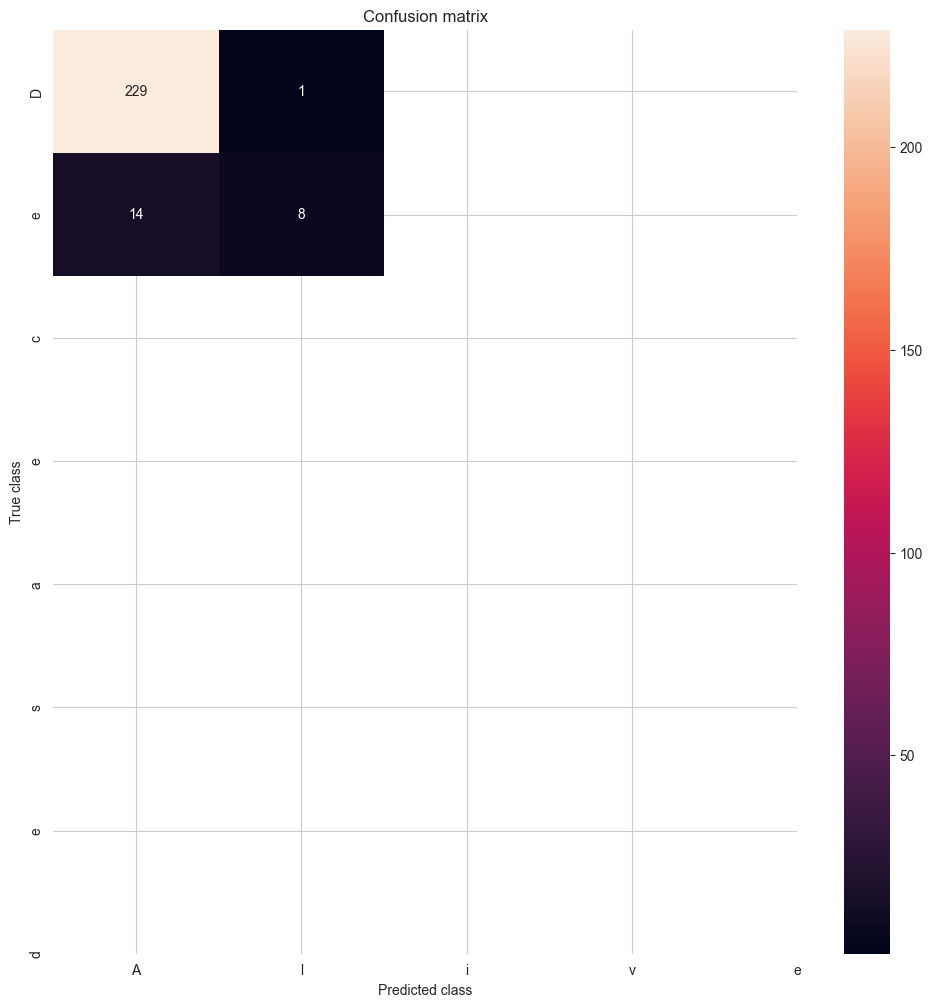

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       230
         1.0       0.89      0.36      0.52        22

    accuracy                           0.94       252
   macro avg       0.92      0.68      0.74       252
weighted avg       0.94      0.94      0.93       252



In [35]:
evaluate_model(clf, X_test, y_test)


# Random Forest classifier

In [36]:
# try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=20)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

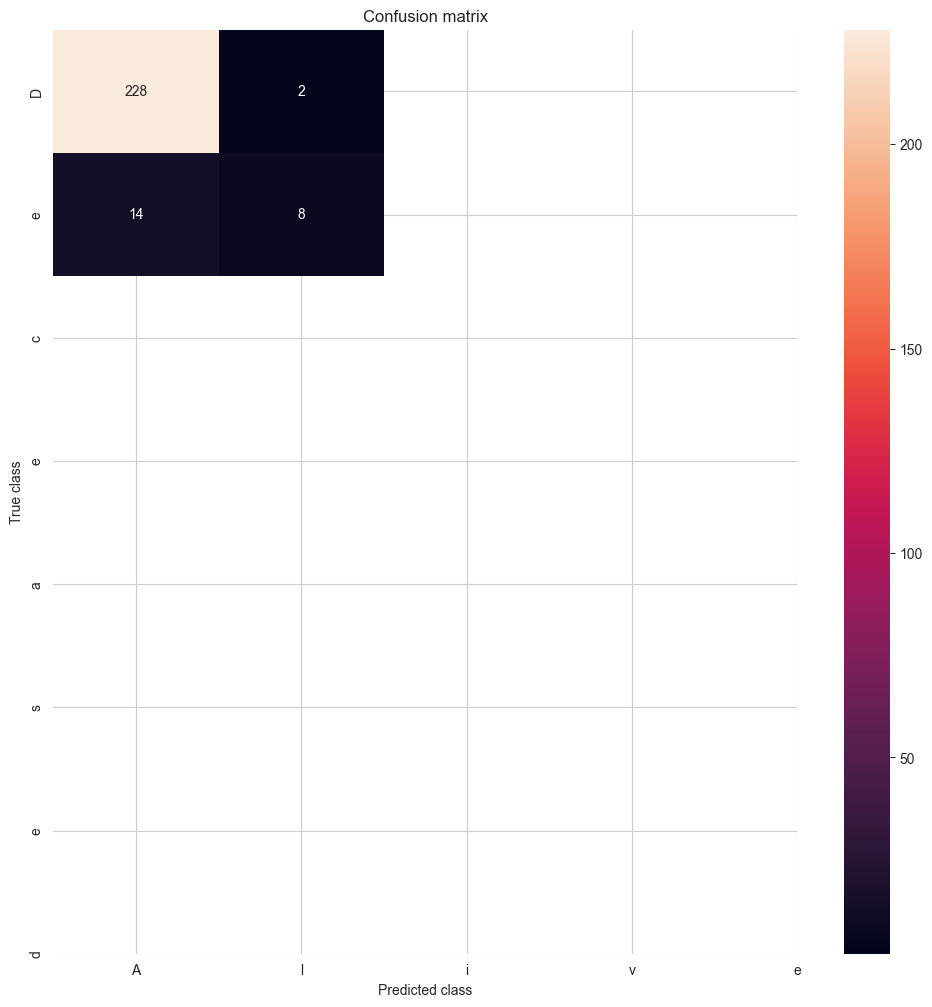

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       230
         1.0       0.80      0.36      0.50        22

    accuracy                           0.94       252
   macro avg       0.87      0.68      0.73       252
weighted avg       0.93      0.94      0.93       252



TV/FV/PCR                            0.131022
glicemia                             0.080171
frecuencia_cardiaca                  0.060990
imc                                  0.052854
filtrado_glomerular                  0.052004
creatinina                           0.050596
presion_arterial_sistolica           0.050129
edad                                 0.050086
peso                                 0.043579
SHOCK                                0.043333
escala_grace                         0.041491
talla                                0.028389
asa                                  0.027830
primera_asistencia_medica            0.025547
FEVI                                 0.025195
indice_killip                        0.021242
otros_diureticos                     0.017104
presion_arterial_diastolica          0.016828
diabetes_mellitus                    0.015658
anticoagulantes                      0.011338
ada                                  0.010787
nitratos                          

In [37]:
evaluate_model(rf_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

# Logistic Regression classifier

In [38]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
def lrcv(key, target_vars, df, resample=True):
    X = df.drop(target_vars[key], axis=1)
    y = df[key]
    print('\n{0}\n'.format(key))

    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) # 80% training and 20% test

    if resample:
        smote = SMOTE()
        print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("Before oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
        X_train, y_train = smote.fit_sample(X_train, y_train.ravel())
        print("After oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("After oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
#         plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
        
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     predicted = cross_val_predict(LogisticRegression(), X, y, cv=cv)
    print('accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))
    
    feature_coefs = pd.Series(clf.coef_.reshape(-1),index=cols).sort_values(ascending=False)
    print(feature_coefs)
    
    print('Confusion matrix:\n')
    cm = metrics.confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt="d")

    return clf


estado_vital

accuracy: 0.9087301587301587
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       232
         1.0       0.29      0.10      0.15        20

    accuracy                           0.91       252
   macro avg       0.61      0.54      0.55       252
weighted avg       0.88      0.91      0.89       252

TV/FV/PCR           0.176196
FEVI                0.113714
glicemia            0.110226
edad                0.091006
furosemida          0.076286
                      ...   
otros_diureticos   -0.043824
atencion_inicial   -0.051122
indice_killip      -0.075144
imc                -0.092799
indice_mkillip     -0.093594
Length: 61, dtype: float64
Confusion matrix:



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


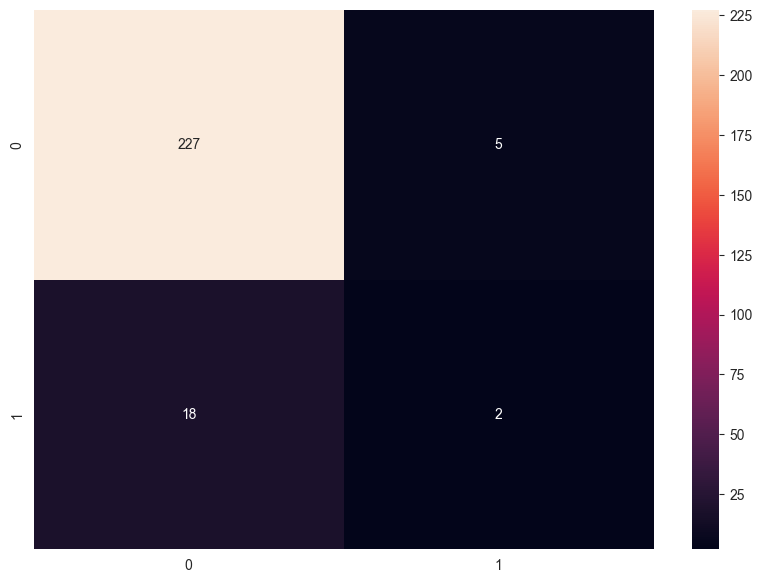

In [40]:
target_vars = {'estado_vital': ['estado_vital']}

clf = lrcv('estado_vital', target_vars, df, resample=False)

# K-Fold Cross Validation

In [41]:
from sklearn import svm
from sklearn.model_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate(C, X_test, y_test):
    y_pred = C.predict(X_test)
    
    k_fold = KFold(10, shuffle = False, random_state=None) #10-fold cross-validation
    cv_scores = cross_val_score(C, X_test, y_test.values.ravel(), cv = k_fold)

    print("Cross-validation score means: ", cv_scores.mean())
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='Alive' , yticklabels='Deceased', annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

Cross-validation score means:  0.913076923076923
Accuracy:  0.9404761904761905
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       230
         1.0       0.89      0.36      0.52        22

    accuracy                           0.94       252
   macro avg       0.92      0.68      0.74       252
weighted avg       0.94      0.94      0.93       252



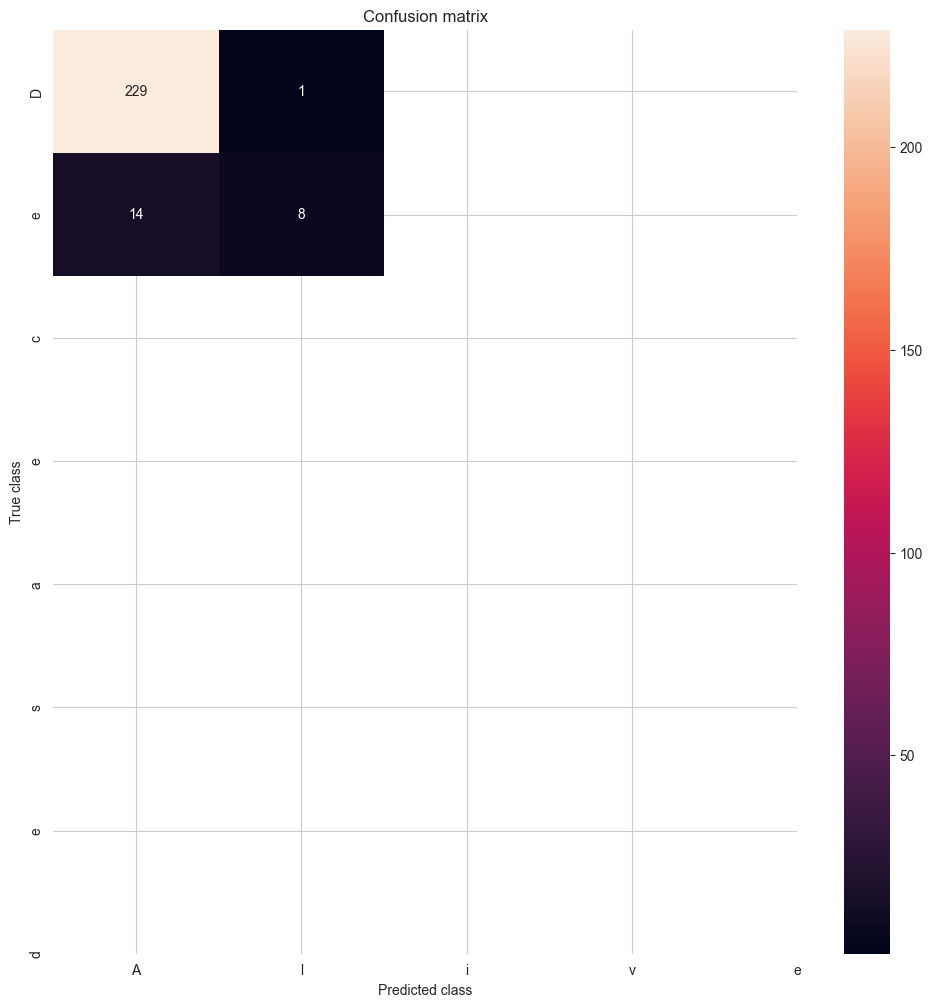

In [42]:
#training SVM SVC w/rbf kernel
C = svm.SVC(gamma = 'scale') #create classifier
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.3453846153846154
Accuracy:  0.4166666666666667
              precision    recall  f1-score   support

         0.0       1.00      0.36      0.53       230
         1.0       0.13      1.00      0.23        22

    accuracy                           0.42       252
   macro avg       0.57      0.68      0.38       252
weighted avg       0.92      0.42      0.50       252



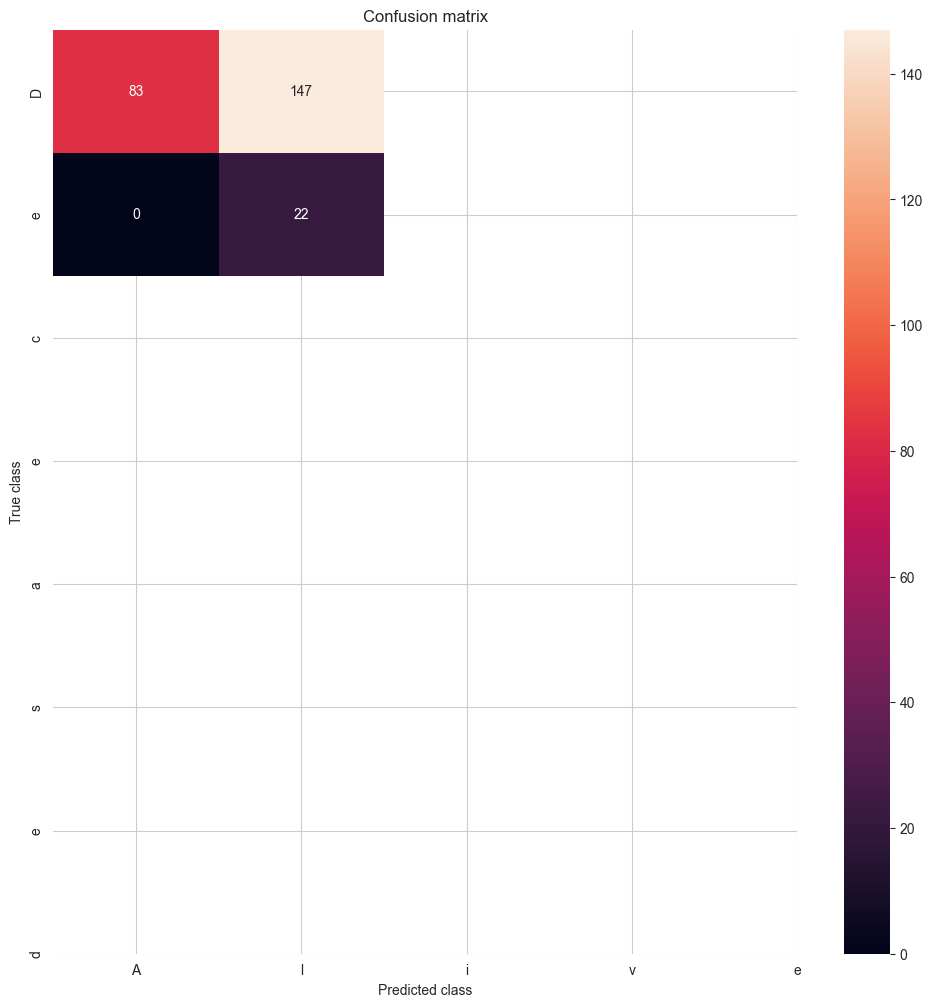

In [43]:
#training Gaussian Naive Bayes classifier
C = GaussianNB()
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8893846153846153
Accuracy:  0.9126984126984127
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       230
         1.0       0.50      0.55      0.52        22

    accuracy                           0.91       252
   macro avg       0.73      0.75      0.74       252
weighted avg       0.92      0.91      0.91       252



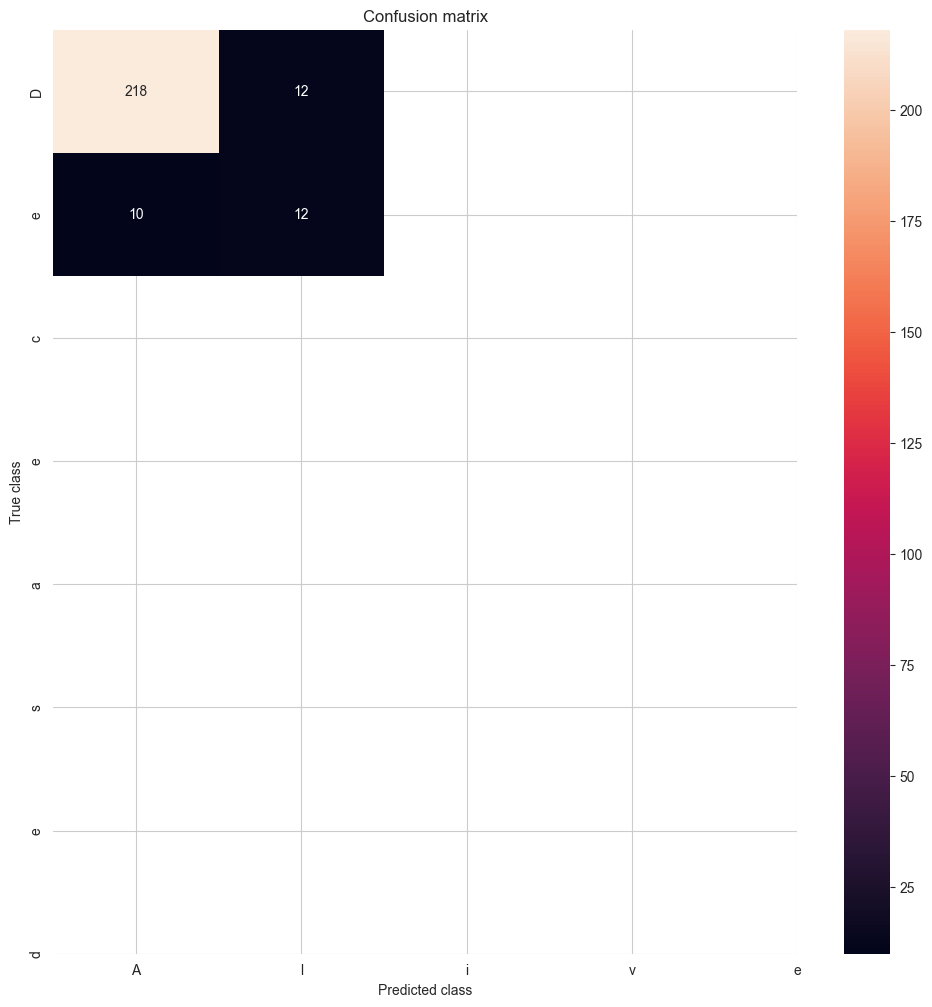

In [44]:
#training supervised MLP
C = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (100,))
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8217198581560284
Accuracy:  0.910828025477707
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       235
         1.0       0.85      1.00      0.92       236

    accuracy                           0.91       471
   macro avg       0.92      0.91      0.91       471
weighted avg       0.92      0.91      0.91       471



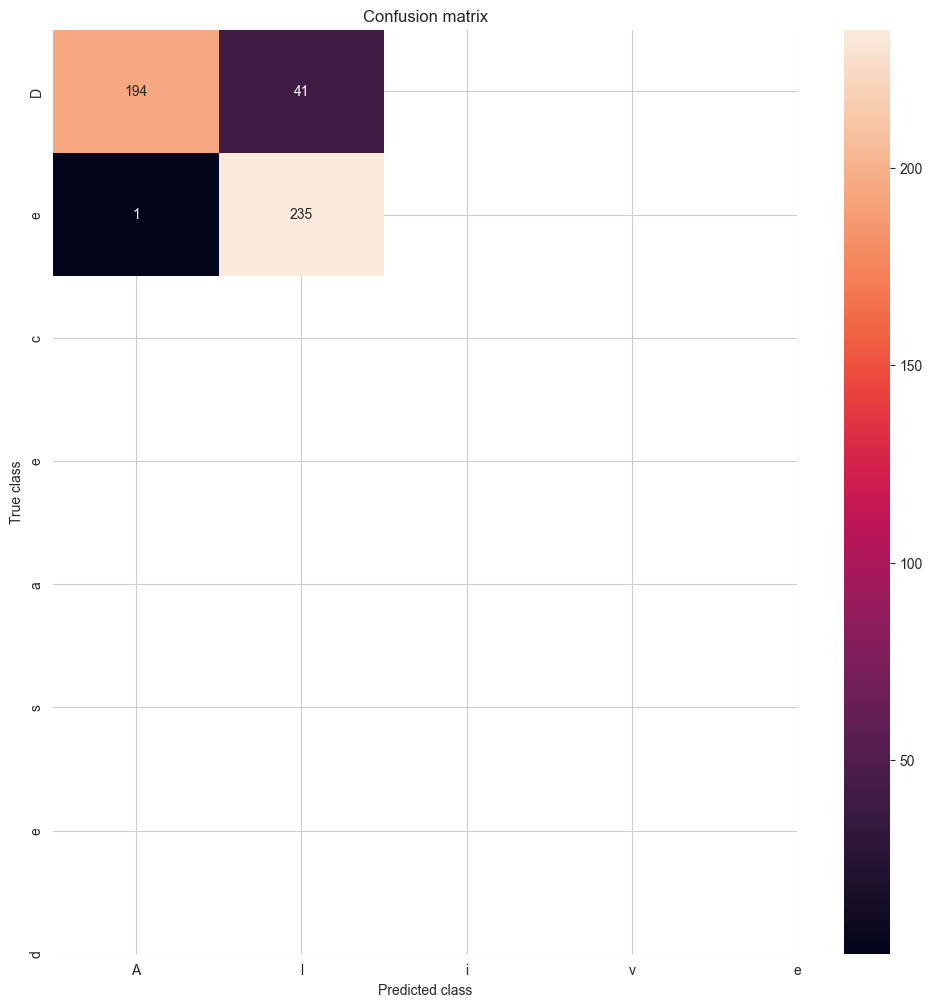

In [24]:
#training KNN
C = KNeighborsClassifier(n_neighbors = 3)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.9130769230769232
Accuracy:  0.9484126984126984
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       230
         1.0       0.91      0.45      0.61        22

    accuracy                           0.95       252
   macro avg       0.93      0.73      0.79       252
weighted avg       0.95      0.95      0.94       252



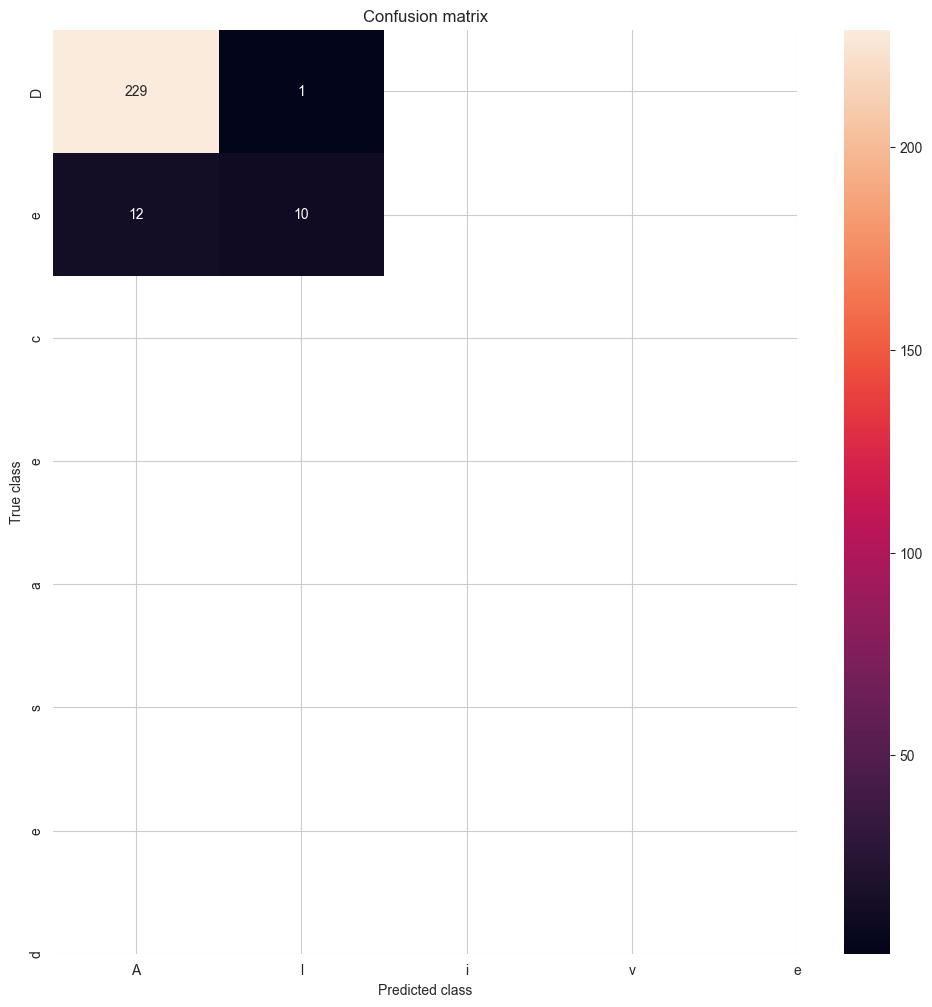

In [45]:
#training random forest classifier
C = RandomForestClassifier(n_estimators = 100)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.9250769230769229
Accuracy:  0.9285714285714286
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       230
         1.0       0.62      0.45      0.53        22

    accuracy                           0.93       252
   macro avg       0.79      0.71      0.74       252
weighted avg       0.92      0.93      0.92       252



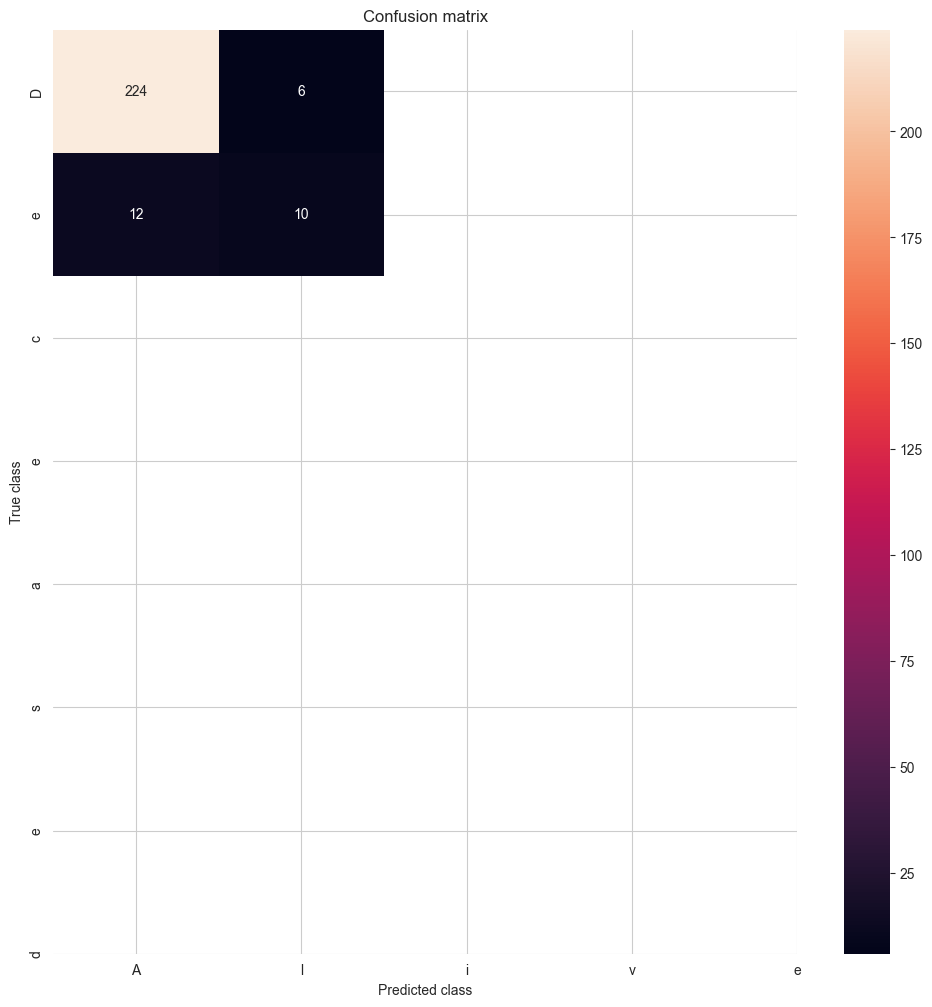

In [46]:
#Training logistic regression model
C = LogisticRegression(solver = 'lbfgs')
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)